Matplotlib Fromatting Charts

In [2]:
#import all the neccessary libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

#load_dataset
dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

#data cleanup
df['job_posted_date']=pd.to_datetime(df['job_posted_date'])
#we also want to clean up the job_skills col
#values dtype here are string but we need it to be list
#use the apply method and with the help of lambda convert string to list with the help of ast library
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\saxen\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: xlabel='job_title_short'>

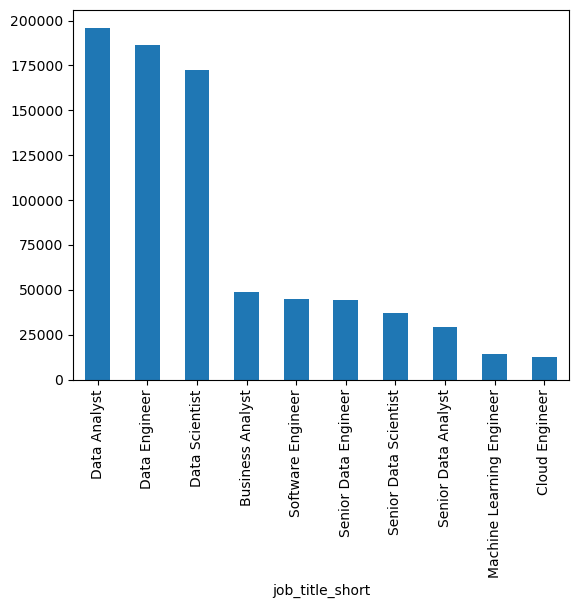

In [3]:
#now we will start to plot a subplots
#we need 2 objects fig, ax
#fig , ax =plt.subplots()
#fig, ax=plt.subplots(2,2)
fig, ax=plt.subplots()

#now we will count the no of times each job title appeared
df['job_title_short'].value_counts().plot(kind='bar',ax=ax)

In [4]:
#now well count how many times each job_schedule_type appeared
#for eg: full_time appreared 3 times part_time appeared 4 times etc..
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

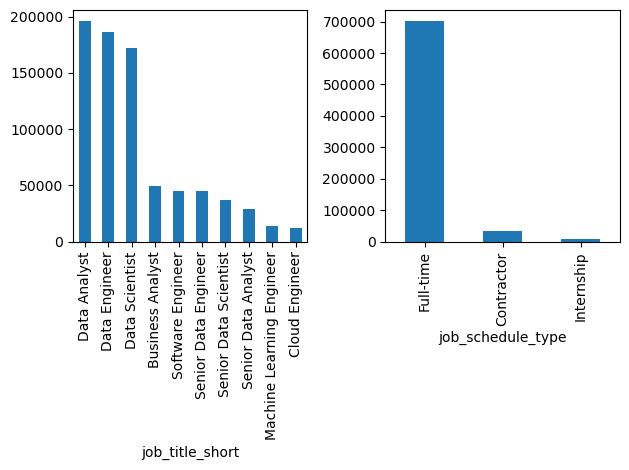

In [5]:
#fig , ax=plt.subplot(rows,columns)
fig, ax=plt.subplots(1,2)
#now we want to plot these 2 together
#again call it here 
df['job_title_short'].value_counts().plot(kind='bar',ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar',ax=ax[1])

#we see that there are some overlaps here
#so we use a function called tight_layout on the figure
fig.tight_layout()

In [6]:
''' 
The Simple Explanation:
Imagine you want to show two different charts next to each other:

Left chart: Most common job titles

Right chart: Most common work schedules

This code creates exactly that - two bar charts sharing one screen.

Step-by-Step Breakdown:
fig, ax = plt.subplots(1,2)

"Create a blank canvas with 2 spots side-by-side for charts"

fig = the entire canvas/frame

ax = an array containing the two chart spots: ax[0] (left) and ax[1] (right) as we define ax=2 here at ax[0] well have job_title_Short and ax[1] well have job_schedule_type

First Chart (Left side - ax[0])

df['job_title_short'].value_counts() → "Count how many times each job title appears"

.plot(kind='bar', ax=ax[0]) → "Draw a bar chart in the left spot"

Shows: Most common job titles (Data Scientist, Data Engineer, etc.)

Second Chart (Right side - ax[1])

df['job_schedule_type'].value_counts().head(3) → "Count work schedules, but only show top 3"

.plot(kind='bar', ax=ax[1]) → "Draw a bar chart in the right spot"

Shows: Top 3 work schedules (Full-time, Contract, Part-time, etc.)
'''

' \nThe Simple Explanation:\nImagine you want to show two different charts next to each other:\n\nLeft chart: Most common job titles\n\nRight chart: Most common work schedules\n\nThis code creates exactly that - two bar charts sharing one screen.\n\nStep-by-Step Breakdown:\nfig, ax = plt.subplots(1,2)\n\n"Create a blank canvas with 2 spots side-by-side for charts"\n\nfig = the entire canvas/frame\n\nax = an array containing the two chart spots: ax[0] (left) and ax[1] (right) as we define ax=2 here at ax[0] well have job_title_Short and ax[1] well have job_schedule_type\n\nFirst Chart (Left side - ax[0])\n\ndf[\'job_title_short\'].value_counts() → "Count how many times each job title appears"\n\n.plot(kind=\'bar\', ax=ax[0]) → "Draw a bar chart in the left spot"\n\nShows: Most common job titles (Data Scientist, Data Engineer, etc.)\n\nSecond Chart (Right side - ax[1])\n\ndf[\'job_schedule_type\'].value_counts().head(3) → "Count work schedules, but only show top 3"\n\n.plot(kind=\'bar\',

Example- Counts of top skills in job postings
eg: datasceinece=> ml,python,sql...

In [7]:
#here we are going to use the same df that we used in the explode skills section
#first create a copy of the original df and store in a new df
df_skills=df.copy()
#now we will access the job_skills col from the new df and explode it so we get individual row values
df_skills=df_skills.explode('job_skills')
skills_Count=df_skills.groupby(['job_skills','job_title_short']).size()
#now skill count is a series because of groupby function
#convert it into df by using reset_index() method (reset_index gives proper column names)
df_skills_count=skills_Count.reset_index(name='skill_count')
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)
df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


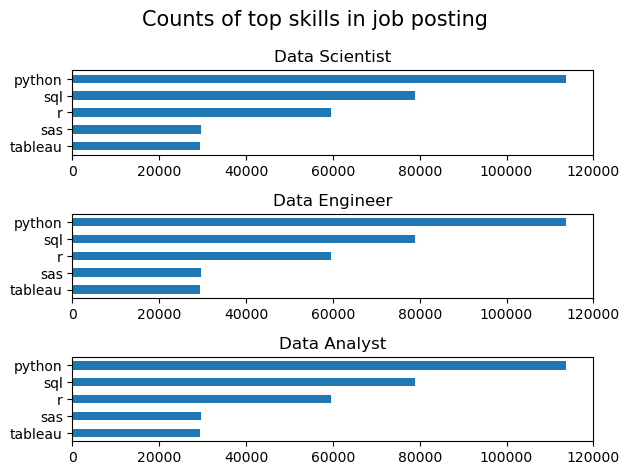

In [12]:
#now i want to plot data analyst , data engineer, data scientist
job_titles=['Data Scientist','Data Engineer','Data Analyst']
#create the subplot
#here were taking 3 rows and 1 col
#now for loop to loop throught the job_title list
#we use enumerate as it first gives us the index and then the value
fig, ax=plt.subplots(3,1)
#for i, job_title in enumerate(job_titles):
#    print(i, job_title)

#but first we need to filter it out and get only the top 5 skills for data scientist
#i here is the index and job_title is the iterator
for i, job_title in enumerate(job_titles):
   #create a new df which shows top 5 skills of data scientist
   df_plot=df_skills_count[df_skills_count['job_title_short']=='Data Scientist'].head(5)
   df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
   #now we need to invert the yaxis
   #well call out the ax and apply
   ax[i].invert_yaxis()
   #to remove label in yaxis
   ax[i].set_ylabel('')
   #to hide the legend
   ax[i].legend().set_visible(False)
   #to align the values properly in x axis .set_xlim(low,high)
   ax[i].set_xlim(0,120000)
fig.suptitle('Counts of top skills in job posting', fontsize=15)
fig.tight_layout()

In [9]:
''' 
This code answers the question: "For each job title, which skills are mentioned most frequently?"

It's like creating a ranking of the most important skills for Data Scientists, Data Engineers, etc.

Step-by-Step Walkthrough:
df_skills = df.copy()

"Make a safe copy of our original data" so we don't accidentally mess up the original.

df_skills = df_skills.explode('job_skills')

"Break apart skill lists into separate rows"

If one job had ['Python', 'SQL', 'Excel'], it becomes 3 separate rows - one for each skill.

skills_Count = df_skills.groupby(['job_skills','job_title_Short']).size()

"Count how many times each skill appears for each job title"

Creates pairs like: (Python, Data Scientist) = 45 times, (SQL, Data Engineer) = 38 times, etc.

df_skills_count = skills_Count.reset_index(name='skill_count')

"Convert the summary into a proper table" with clear column names.

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

"Sort the results from highest to lowest count" - most demanded skills first.
'''

' \nThis code answers the question: "For each job title, which skills are mentioned most frequently?"\n\nIt\'s like creating a ranking of the most important skills for Data Scientists, Data Engineers, etc.\n\nStep-by-Step Walkthrough:\ndf_skills = df.copy()\n\n"Make a safe copy of our original data" so we don\'t accidentally mess up the original.\n\ndf_skills = df_skills.explode(\'job_skills\')\n\n"Break apart skill lists into separate rows"\n\nIf one job had [\'Python\', \'SQL\', \'Excel\'], it becomes 3 separate rows - one for each skill.\n\nskills_Count = df_skills.groupby([\'job_skills\',\'job_title_Short\']).size()\n\n"Count how many times each skill appears for each job title"\n\nCreates pairs like: (Python, Data Scientist) = 45 times, (SQL, Data Engineer) = 38 times, etc.\n\ndf_skills_count = skills_Count.reset_index(name=\'skill_count\')\n\n"Convert the summary into a proper table" with clear column names.\n\ndf_skills_count.sort_values(by=\'skill_count\', ascending=False, inpl